# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('RF_Pad.csv')

In [3]:
df_2=df

In [4]:
df_2['Weekend']=np.abs(1-df_2['Weekday'])
df_2['Gender_Male']=np.abs(1-df_2['Gender_Female'])

In [5]:
df_2.columns

Index(['Unnamed: 0', 'Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF',
       'Src_Weather_Info', 'NR_HR', 'Age', 'Trait_Anxiety', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Weekday', 'Gender_Female', 'Weekend', 'Gender_Male'],
      dtype='object')

In [6]:
df_2.drop(['Unnamed: 0','BP_Hg'],axis=1,inplace=True)

In [7]:
df_2['Src_Weather_Info'].unique()

array([0, 1, 3, 2, 5, 4])

In [8]:
df_2.rename(columns={"NR_HR": "HR_Norm", "JF": "Jam Factor","FF":"Free Flow"}, inplace=True)

In [9]:
df_2

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,0.0,31.800000,0.64059,34.05,0,21.468326,29,38,10,8,6,7,6,1,1,0,0
1,0.0,31.800000,0.64059,34.05,0,21.468326,29,38,10,8,6,7,6,1,1,0,0
2,0.0,31.800000,0.64059,34.05,0,21.468326,29,38,10,8,6,7,6,1,1,0,0
3,0.0,31.800000,0.64059,34.05,0,21.468326,29,38,10,8,6,7,6,1,1,0,0
4,0.0,31.800000,0.64059,34.05,0,21.468326,29,38,10,8,6,7,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,39.875647,28,50,6,7,6,5,8,0,1,1,0
305982,0.0,2.700000,0.00000,28.46,5,39.875647,28,50,6,7,6,5,8,0,1,1,0
305983,0.0,2.050000,0.00000,28.46,5,42.671897,28,50,6,7,6,5,8,0,1,1,0
305984,0.0,1.166667,0.00000,28.46,5,42.524577,28,50,6,7,6,5,8,0,1,1,0


In [10]:
df_psych=df_2.drop(['Speed_MPH','ATP','Jam Factor','Free Flow','Src_Weather_Info','Weekday','Weekend'], axis=1)

In [11]:
df_2.corr()['HR_Norm'].sort_values()

Gender_Female       -0.166953
Age                 -0.149003
Weekend             -0.142235
ATP                 -0.111892
Free Flow           -0.078200
Agreeableness       -0.043561
Speed_MPH           -0.037013
Jam Factor          -0.036640
Openness            -0.033199
Src_Weather_Info     0.005699
Extraversion         0.041476
Trait_Anxiety        0.052223
Neuroticism          0.061230
Conscientiousness    0.096314
Weekday              0.142235
Gender_Male          0.166953
HR_Norm              1.000000
Name: HR_Norm, dtype: float64

## Scaling the Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar=StandardScaler()

In [14]:
def scale_df(df):
    scalar=StandardScaler()
    scalar.fit(df)
    df_scale=scalar.transform(df)
    df_scaled=pd.DataFrame(data=df_scale, columns=df.columns)
    return df_scaled

In [15]:
df_scaled=scale_df(df_2)

In [16]:
df_scaled

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
1,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
2,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
3,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
4,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.222578,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305982,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.222578,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305983,-1.268567,-1.290525,-0.978509,-1.276099,6.278876,1.484548,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305984,-1.268567,-1.345077,-0.978509,-1.276099,6.278876,1.470746,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924


In [17]:
# from scipy.stats import probplot
# for i in df_2.columns:
#     probplot(x=df_2[i],dist='norm',plot=plt)
#     plt.title(i)
#     plt.show()

In [18]:
# from sklearn.preprocessing import FunctionTransformer

In [19]:
# from sklearn.compose import ColumnTransformer

In [20]:
# df_2.columns

In [21]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [22]:
# log_transform = FunctionTransformer(lambda x: np.log(x))
# ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
# log_X = ct.fit_transform(df_scaled).copy()
# log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

## Building the Network

In [23]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [24]:
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [25]:
corr = df_2.corr(method=spearmanr_pval)

In [26]:
corr

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed_MPH,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362154e-209,1.749992e-56,0.000000e+00,5.038411e-124,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.857894e-149,0.000000e+00,1.857894e-149,0.000000e+00
ATP,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.068081e-141,0.000000e+00,0.000000e+00,0.000000,1.092364e-13,0.000000e+00,2.232939e-03,4.026714e-13,0.000000e+00,4.026714e-13,0.000000e+00
Jam Factor,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.328184e-18,0.000000e+00,5.206359e-49,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Free Flow,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.530111e-08,0.000000e+00,0.000000,8.901646e-83,0.000000e+00,0.000000e+00,1.449367e-07,0.000000e+00,1.449367e-07,0.000000e+00
Src_Weather_Info,2.362154e-209,0.000000e+00,5.328184e-18,0.000000e+00,1.000000e+00,6.529015e-30,1.029786e-179,3.475498e-52,0.000000e+00,0.000000,1.361344e-175,5.710236e-115,2.851106e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HR_Norm,1.749992e-56,0.000000e+00,0.000000e+00,0.000000e+00,6.529015e-30,1.000000e+00,0.000000e+00,8.108188e-270,8.937513e-16,0.000000,2.705737e-161,5.544404e-62,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Age,0.000000e+00,1.068081e-141,5.206359e-49,0.000000e+00,1.029786e-179,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.365924e-217,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Trait_Anxiety,5.038411e-124,0.000000e+00,0.000000e+00,9.530111e-08,3.475498e-52,8.108188e-270,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.470512e-61,0.000000e+00,3.470512e-61,0.000000e+00
Extraversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.937513e-16,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.734318e-80,4.049264e-08,5.734318e-80,4.049264e-08
Agreeableness,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.512935e-04,0.000000e+00,5.512935e-04,0.000000e+00


In [27]:
df_2=df_scaled

In [28]:
# corr_matrix=df_2.corr().abs()
# half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
# df_2.drop(dropped_columns, axis=1, inplace=True)
# dropped_columns

In [29]:
calculate_spearman(df_2)

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed_MPH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0022,0.0,0.0,0.0,0.0
Jam Factor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free Flow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Weather_Info,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HR_Norm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trait_Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extraversion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agreeableness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0006,0.0


In [30]:
import networkx as nx

In [31]:
from matplotlib.pyplot import figure

In [32]:
G=nx.Graph()

In [33]:
pvals=calculate_spearman(df_2)

In [34]:
columns=pvals.columns

In [35]:
pvalues=pvals.values

In [36]:
nonzero=[]
for row in pvalues:
    for val in row:
        if val!=0:
            nonzero.append(val)

In [37]:
benjamini_hochberg=[]

In [38]:
sort=sorted(nonzero)
for i in range(len(sort)):
    benjamini_hochberg.append((i+1)*0.05) 

In [39]:
benjamini_hochberg

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5]

In [40]:
sort

[0.0006,
 0.0006,
 0.0006,
 0.0006,
 0.0022,
 0.0022,
 0.4132,
 0.4132,
 0.4132,
 0.4132]

In [41]:
# sm.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [42]:
columns

Index(['Speed_MPH', 'ATP', 'Jam Factor', 'Free Flow', 'Src_Weather_Info',
       'HR_Norm', 'Age', 'Trait_Anxiety', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Weekday',
       'Gender_Female', 'Weekend', 'Gender_Male'],
      dtype='object')

In [43]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [44]:
df_map=pd.DataFrame()

In [45]:
df_map['Source']=nonzeros['Indexes']

In [46]:
df_map['Destination']=nonzeros['Columns']

In [47]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [48]:
df_map

,Source,Destination,Weights
0,ATP,Openness,6.119298
1,Agreeableness,Weekday,7.418581
2,Agreeableness,Weekend,7.418581
3,Openness,ATP,6.119298
4,Openness,Weekday,0.883824
5,Openness,Weekend,0.883824
6,Weekday,Agreeableness,7.418581
7,Weekday,Openness,0.883824
8,Weekend,Agreeableness,7.418581
9,Weekend,Openness,0.883824


In [49]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

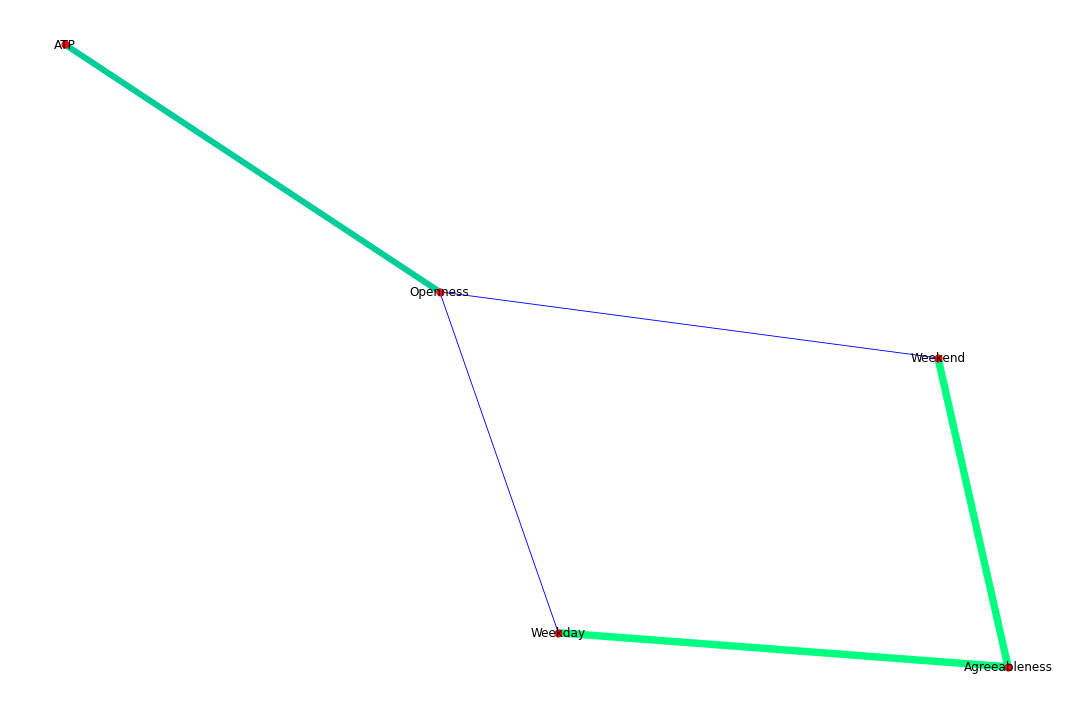

In [50]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [51]:
import networkx.algorithms.community as nx_com

In [52]:
from community import community_louvain

We can define a new centrality measure that computes the sum of the absolute values of the weights from each node. 

In [53]:
def weighted_centrality(df):
    new_centrality={}
    for index, row in df.iterrows():
        if row['Source'] not in new_centrality.keys():
            new_centrality[row['Source']]=0
        new_centrality[row['Source']]+=np.abs(row['Weights'])
        if row['Destination'] not in new_centrality.keys():
            new_centrality[row['Destination']]=0
        new_centrality[row['Destination']]+=np.abs(row['Weights'])
    return new_centrality

The following method does the following: for a graph G, it applies the louvain detection algorithm 1000 times, and counts how often each pair of features is grouped together. It then determines the best way to split the features into distinct groups (communities). 

In [54]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G)
        mod = community_louvain.modularity(label, G)
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=500, cmap=plt.cm.hsv)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()
    
    

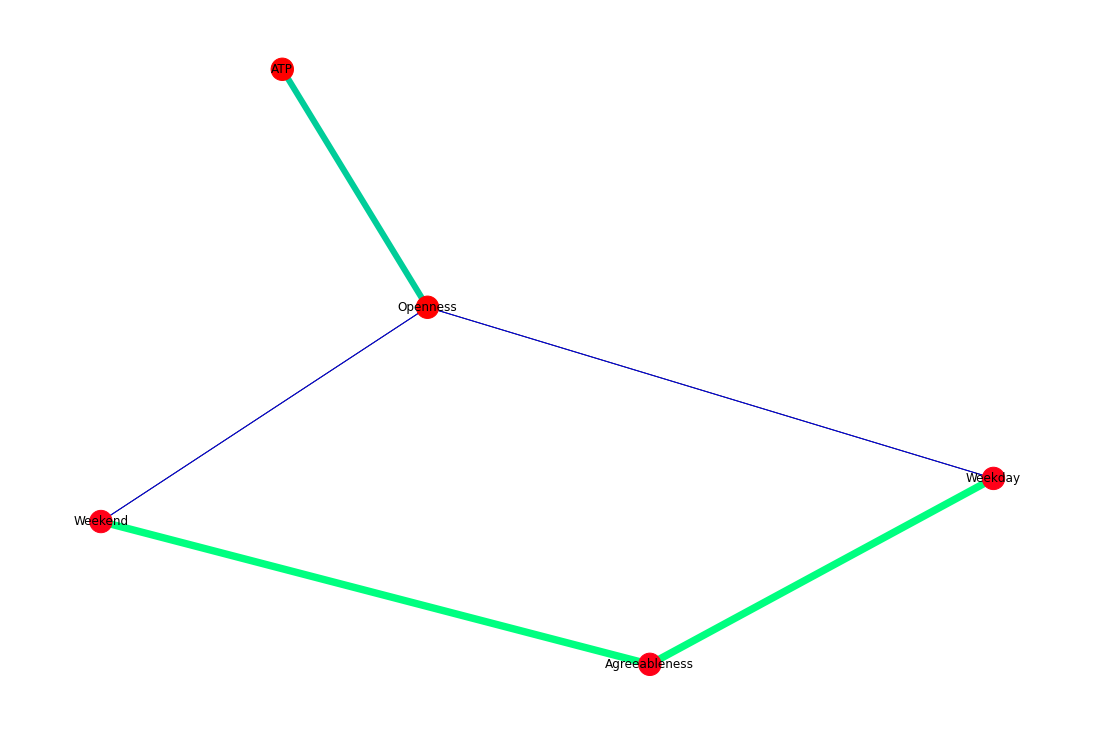

In [55]:
louvain_detection(G)

## Building the Markov Network

In [56]:
centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [57]:
sorted((f"{c:0.2f}", v) for v, c in centrality.items())

[('0.26', 'ATP'),
 ('0.44', 'Agreeableness'),
 ('0.46', 'Weekday'),
 ('0.46', 'Weekend'),
 ('0.56', 'Openness')]

In [58]:
from sklearn.covariance import GraphicalLasso

In [59]:
def invcov(df):
    gl=GraphicalLasso()
    fit=gl.fit(df.values)
    inv_cov=pd.DataFrame(data=fit.covariance_,columns=df.columns)
    index={}
    for i in range(len(df.columns)):
        index[i]=df.columns[i]
    inv_cov.rename(index=index, inplace=True)
    return inv_cov

In [60]:
inv_cov=invcov(df_2)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010672098716288381, tolerance: 7.363437030313922e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:315: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 4.401e-03
  warnings.warn(


In [61]:
inv_cov

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed_MPH,1.000000,0.331287,-0.331009,0.487755,-0.055154,-0.041608,-0.130515,-0.064566,-0.172843,-0.322002,-0.096752,-0.224154,0.311296,-0.039356,-0.181878,0.039364,0.181870
ATP,0.331287,1.000000,-0.160789,0.314936,-0.115536,-0.101891,-0.027973,-0.099946,0.032541,-0.066716,0.046222,-0.137116,-0.054801,-0.019981,-0.233314,0.019984,0.233320
Jam Factor,-0.331009,-0.160789,1.000000,-0.367095,0.049353,-0.026640,0.035943,0.106480,0.117191,0.225188,0.108652,0.194577,-0.234298,0.117123,0.155682,-0.117129,-0.155677
Free Flow,0.487755,0.314936,-0.367095,1.000000,-0.117049,-0.068199,-0.105671,0.014967,-0.178749,-0.207842,-0.068637,-0.156656,0.166514,-0.001253,-0.095353,0.001257,0.095347
Src_Weather_Info,-0.055154,-0.115536,0.049353,-0.117049,1.000000,-0.004302,0.029944,-0.022346,0.121487,0.089387,0.075628,0.011694,0.020873,-0.115516,0.043547,0.115515,-0.043548
HR_Norm,-0.041608,-0.101891,-0.026640,-0.068199,-0.004302,1.000000,-0.159005,0.042225,0.031472,-0.046454,0.086315,0.051228,-0.042392,0.132237,-0.156952,-0.132235,0.156952
Age,-0.130515,-0.027973,0.035943,-0.105671,0.029944,-0.159005,1.000000,-0.504302,0.334682,0.339934,-0.191578,-0.214292,0.004539,0.027443,0.195692,-0.027426,-0.195676
Trait_Anxiety,-0.064566,-0.099946,0.106480,0.014967,-0.022346,0.042225,-0.504302,1.000000,-0.278288,0.253077,0.220256,0.622921,-0.460227,-0.021008,0.591295,0.020989,-0.591267
Extraversion,-0.172843,0.032541,0.117191,-0.178749,0.121487,0.031472,0.334682,-0.278288,1.000000,0.594251,0.391364,0.160963,-0.372779,-0.009367,-0.013331,0.009360,0.013351
Agreeableness,-0.322002,-0.066716,0.225188,-0.207842,0.089387,-0.046454,0.339934,0.253077,0.594251,1.000000,0.388061,0.515668,-0.754436,-0.000381,0.562532,0.000378,-0.562497


In [62]:
def create_invcov_df(df):
    columns=df.columns
    nonzero={}
    nonzero['Indexes']=[]
    nonzero['Elements']=[]
    nonzero['Columns']=[]
    for index, col in df.iteritems():
        counter=0
        arr=col.values
        for elem in arr:
            if np.absolute(elem-1)>0.000001 and index!=columns[counter]: #eliminate correlations between same variable
                nonzero['Indexes'].append(index)
                nonzero['Elements'].append(elem*2)
                nonzero['Columns'].append(columns[counter])
            counter+=1
    df_map=pd.DataFrame()
    df_map['Source']=nonzero['Indexes']
    df_map['Destination']=nonzero['Columns']
    df_map['Weights']=nonzero['Elements']
    return df_map

In [63]:
df_map2=create_invcov_df(inv_cov)

In [64]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.662574
1,Speed_MPH,Jam Factor,-0.662019
2,Speed_MPH,Free Flow,0.975511
3,Speed_MPH,Src_Weather_Info,-0.110308
4,Speed_MPH,HR_Norm,-0.083215
...,...,...,...
267,Gender_Male,Neuroticism,-1.166638
268,Gender_Male,Openness,0.776557
269,Gender_Male,Weekday,0.003047
270,Gender_Male,Gender_Female,-1.980000


Define the data features into different modalities, like biometric data (gender and age), psychometric data (extraversion, neuroticism, etc.), and so on.

In [65]:
modalities={'Speed_MPH':0,'ATP':0,'Src_Weather_Info':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,'RTP':0,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'HR_Norm':4,'Conscientiousness':2,'Free Flow':1,'Jam Factor':1,'Openness':2, 'Gender_Male':5,'BPM':4}

In [66]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 

In [67]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [68]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

First, the graph with all edges

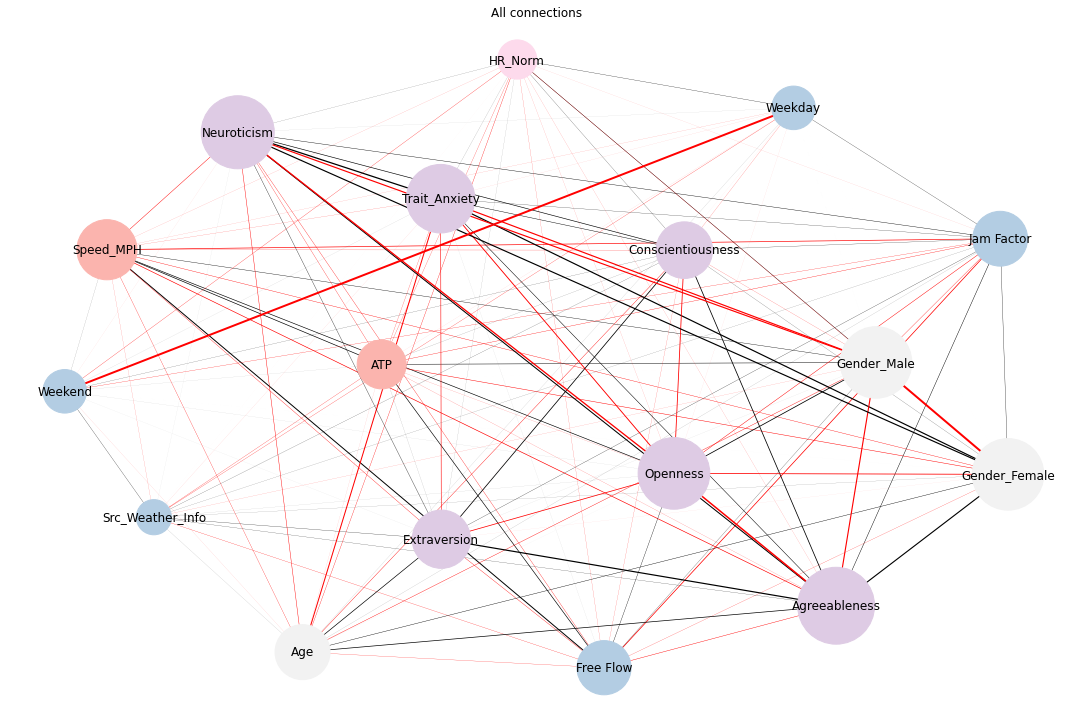

In [69]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('#000000')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_map2)[node])*300 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel2)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [70]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.662574
1,Speed_MPH,Jam Factor,-0.662019
2,Speed_MPH,Free Flow,0.975511
3,Speed_MPH,Src_Weather_Info,-0.110308
4,Speed_MPH,HR_Norm,-0.083215
...,...,...,...
267,Gender_Male,Neuroticism,-1.166638
268,Gender_Male,Openness,0.776557
269,Gender_Male,Weekday,0.003047
270,Gender_Male,Gender_Female,-1.980000


In [71]:
df_psych=scale_df(df_psych)

In [72]:
inv_psych=invcov(df_psych)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.673463266018922e-05, tolerance: 6.990251860289984e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:315: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 5.429e-03
  warnings.warn(


In [73]:
inv_psych

,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
HR_Norm,1.000000,-0.159005,0.042227,0.031473,-0.049651,0.086314,0.051229,-0.043203,-0.156951,0.156952
Age,-0.159005,1.000000,-0.504298,0.337180,0.339939,-0.191577,-0.214293,0.004548,0.195697,-0.195676
Trait_Anxiety,0.042227,-0.504298,1.000000,-0.278299,0.254367,0.220258,0.624993,-0.460222,0.591298,-0.591265
Extraversion,0.031473,0.337180,-0.278299,1.000000,0.594250,0.391365,0.160959,-0.372783,-0.013332,0.013354
Agreeableness,-0.049651,0.339939,0.254367,0.594250,1.000000,0.388064,0.515673,-0.754428,0.562538,-0.562495
Conscientiousness,0.086314,-0.191577,0.220258,0.391365,0.388064,1.000000,0.312451,-0.398458,0.076365,-0.076346
Neuroticism,0.051229,-0.214293,0.624993,0.160959,0.515673,0.312451,1.000000,-0.649844,0.583349,-0.583319
Openness,-0.043203,0.004548,-0.460222,-0.372783,-0.754428,-0.398458,-0.649844,1.000000,-0.388279,0.388278
Gender_Female,-0.156951,0.195697,0.591298,-0.013332,0.562538,0.076365,0.583349,-0.388279,1.000000,-0.990000
Gender_Male,0.156952,-0.195676,-0.591265,0.013354,-0.562495,-0.076346,-0.583319,0.388278,-0.990000,1.000000


In [74]:
df_mapsych=create_invcov_df(inv_psych)

In [75]:
df_mapsych

,Source,Destination,Weights
0,HR_Norm,Age,-0.318009
1,HR_Norm,Trait_Anxiety,0.084454
2,HR_Norm,Extraversion,0.062947
3,HR_Norm,Agreeableness,-0.099303
4,HR_Norm,Conscientiousness,0.172629
...,...,...,...
85,Gender_Male,Agreeableness,-1.124990
86,Gender_Male,Conscientiousness,-0.152692
87,Gender_Male,Neuroticism,-1.166638
88,Gender_Male,Openness,0.776557


In [76]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [77]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

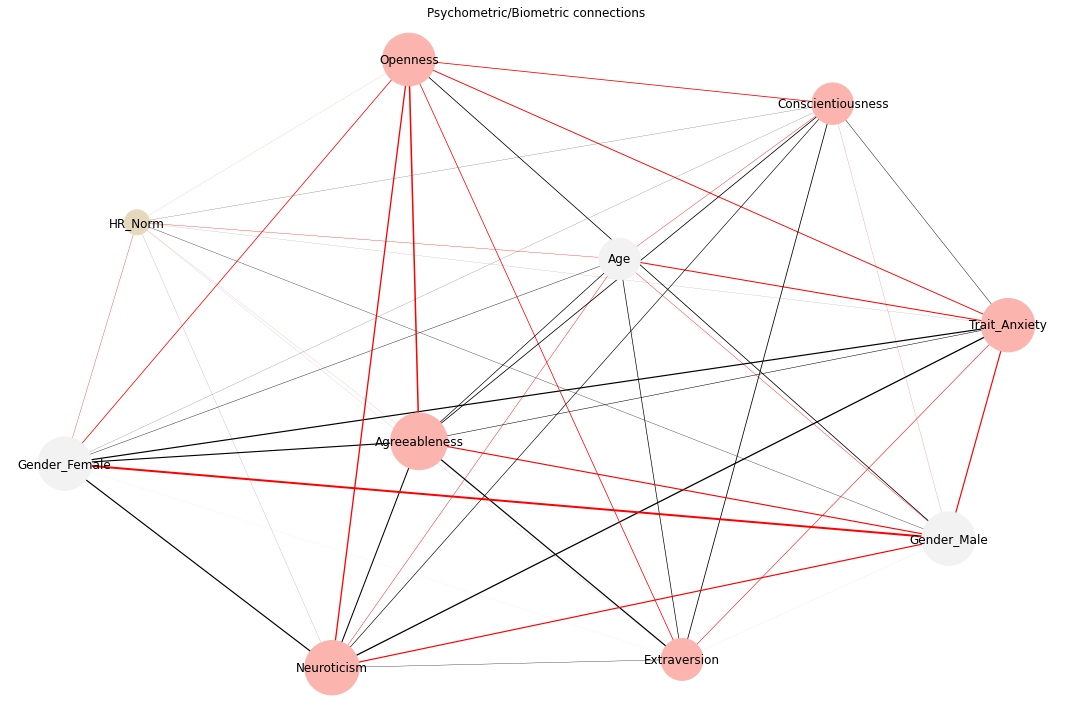

In [78]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('#000000')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7)
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_mapsych)[node])*200 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel2)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Psychometric/Biometric connections")
plt.tight_layout()

In [79]:
df_2

,Speed_MPH,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
1,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
2,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
3,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
4,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.501930,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.222578,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305982,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.222578,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305983,-1.268567,-1.290525,-0.978509,-1.276099,6.278876,1.484548,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305984,-1.268567,-1.345077,-0.978509,-1.276099,6.278876,1.470746,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924


In [80]:
df_nops=df_2.drop(['Openness','Conscientiousness','Agreeableness','Extraversion','Neuroticism'],axis=1)

In [81]:
df_nops=scale_df(df_nops)

In [82]:
inv_nops=invcov(df_nops)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.654917499030136e-05, tolerance: 4.0864667078894375e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [83]:
df_manos=create_invcov_df(inv_nops)

In [84]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [85]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

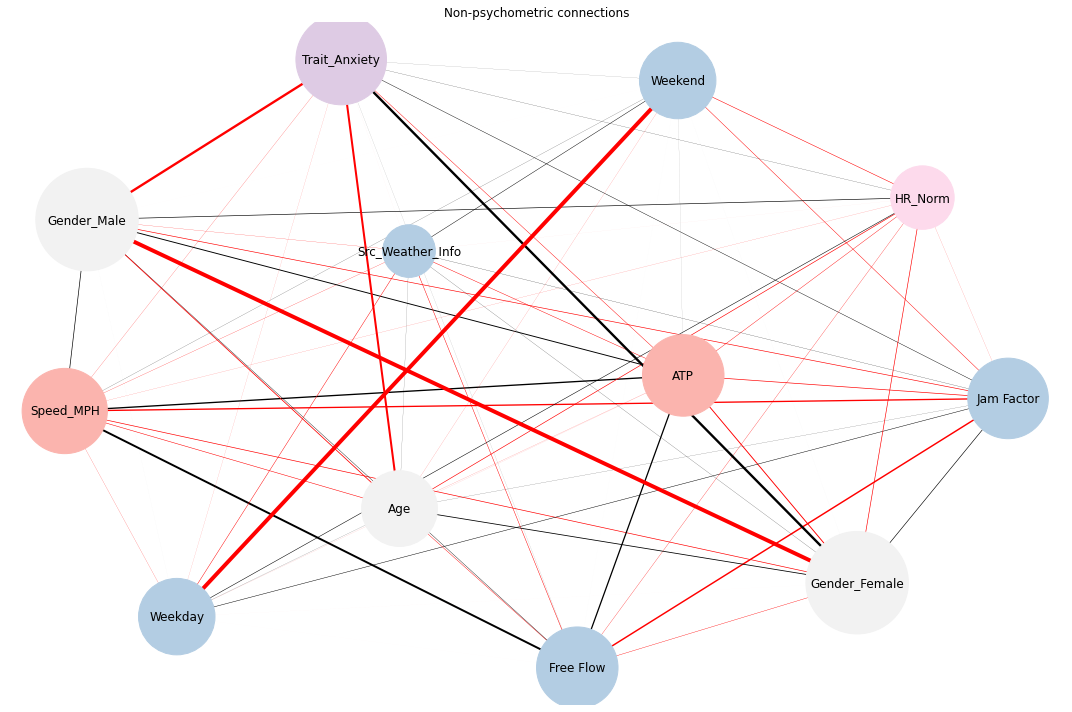

In [86]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('#000000')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel2)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

In [87]:
df_2.corr()['HR_Norm'].sort_values()

Gender_Female       -0.166953
Age                 -0.149003
Weekend             -0.142235
ATP                 -0.111892
Free Flow           -0.078200
Agreeableness       -0.043561
Speed_MPH           -0.037013
Jam Factor          -0.036640
Openness            -0.033199
Src_Weather_Info     0.005699
Extraversion         0.041476
Trait_Anxiety        0.052223
Neuroticism          0.061230
Conscientiousness    0.096314
Weekday              0.142235
Gender_Male          0.166953
HR_Norm              1.000000
Name: HR_Norm, dtype: float64

In [88]:
inv_nops['Heart Rate (Norm)'].sort_values()

KeyError: 'Heart Rate (Norm)'